In [19]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [33]:
import pandas as pd
import seaborn as sns
import csv

In [21]:
df=pd.read_csv('Meteorite_Landings.csv')

In [22]:
df.tail()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"
45715,Zulu Queen,30414,Valid,L3.7,200.0,Found,1976.0,33.98333,-115.68333,"(33.98333, -115.68333)"


In [23]:
df.isna().sum()

name              0
id                0
nametype          0
recclass          0
mass (g)        131
fall              0
year            291
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [24]:
df=df.dropna()

In [25]:
df.describe()

,id,mass (g),year,reclat,reclong
count,38115.000000,3.811500e+04,38115.000000,38115.000000,38115.000000
mean,25343.139000,1.560071e+04,1989.993913,-39.596529,61.309359
std,17395.360205,6.286817e+05,25.469892,46.175830,80.777583
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,10831.500000,6.630000e+00,1986.000000,-76.716670,0.000000
50%,21732.000000,2.909000e+01,1996.000000,-71.500000,35.666670
75%,39887.500000,1.872900e+02,2002.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,178.200000


<ipython-input-26-b6d9f4d23413>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


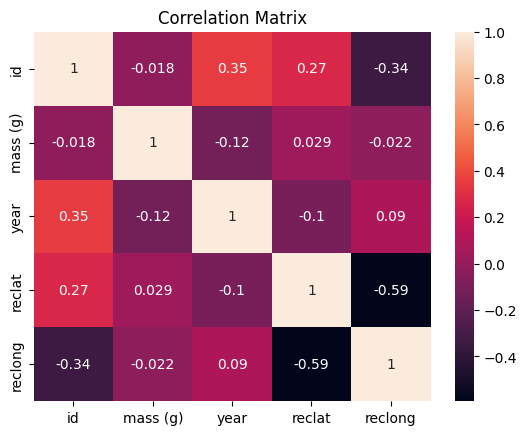

In [26]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [27]:
# Select columns for one-hot encoding
from sklearn.preprocessing import OneHotEncoder
columns_to_encode = ['nametype', 'recclass', 'fall']

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded_features = encoder.fit_transform(df[columns_to_encode])

# Create a new DataFrame with the encoded features
df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the original DataFrame with the encoded DataFrame
df_final = pd.concat([df, df_encoded], axis=1)

# Print the final DataFrame
print(df_final)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


           name     id nametype     recclass  mass (g)  fall    year  \
0        Aachen    1.0    Valid           L5      21.0  Fell  1880.0   
1        Aarhus    2.0    Valid           H6     720.0  Fell  1951.0   
2          Abee    6.0    Valid          EH4  107000.0  Fell  1952.0   
3      Acapulco   10.0    Valid  Acapulcoite    1914.0  Fell  1976.0   
4       Achiras  370.0    Valid           L6     780.0  Fell  1902.0   
...         ...    ...      ...          ...       ...   ...     ...   
38061       NaN    NaN      NaN          NaN       NaN   NaN     NaN   
38074       NaN    NaN      NaN          NaN       NaN   NaN     NaN   
38075       NaN    NaN      NaN          NaN       NaN   NaN     NaN   
38084       NaN    NaN      NaN          NaN       NaN   NaN     NaN   
38089       NaN    NaN      NaN          NaN       NaN   NaN     NaN   

         reclat    reclong           GeoLocation  ...  recclass_Relict OC  \
0      50.77500    6.08333     (50.775, 6.08333)  ...     

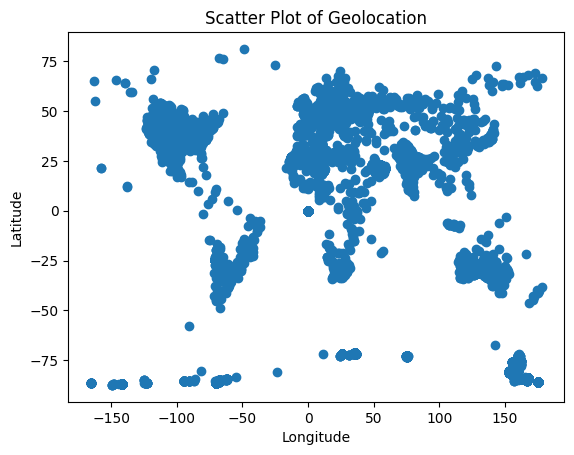

In [29]:
x = df['reclong']
y = df['reclat']

# Create a scatter plot
plt.scatter(x, y)

# Set the labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Geolocation')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


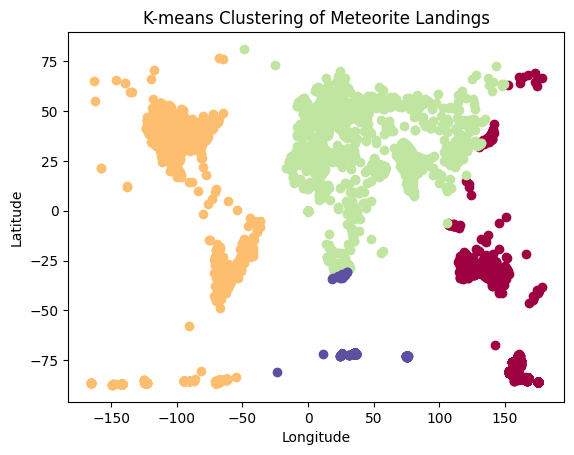

In [30]:
from sklearn.cluster import KMeans

latitudes = df['reclat'].values
longitudes = df['reclong'].values

# Combine latitude and longitude into a single array
coordinates = np.column_stack((latitudes, longitudes))

# Specify the number of clusters you want to create
n_clusters = 4  # Adjust the number of clusters based on your data

# Create an instance of the K-means clustering algorithm
clustering = KMeans(n_clusters=n_clusters)

# Fit the data to the clustering algorithm
clustering.fit(coordinates)

# Obtain the cluster labels assigned to each data point
labels = clustering.labels_

# Plot the clustered data points
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    plt.scatter(longitudes[class_member_mask], latitudes[class_member_mask], color=col)

# Set the labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Meteorite Landings')

# Display the plot
plt.show()


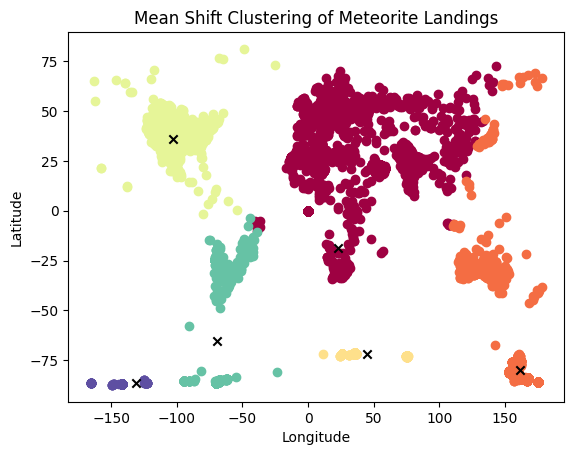

Cluster 0:
[[50.775    6.08333]
 [56.18333 10.23333]
 [32.1     71.8    ]
 ...
 [13.78333  8.96667]
 [49.25    17.66667]
 [49.78917 41.5046 ]]

Cluster 1:
[[  54.21667 -113.     ]
 [  16.88333  -99.9    ]
 [  42.53333  -85.88333]
 ...
 [  18.33333  -97.5    ]
 [  42.51333  -88.48944]
 [  33.98333 -115.68333]]

Cluster 2:
[[-33.16667 -64.95   ]
 [-31.6     -65.23333]
 [-30.86667 -64.55   ]
 ...
 [-19.73333 -48.31667]
 [-41.06667 -62.85   ]
 [-14.83861 -40.83611]]

Cluster 3:
[[ 40.81056 140.78556]
 [-33.15639 115.67639]
 [-31.35    129.19   ]
 ...
 [-31.19167 121.53333]
 [-29.5     118.75   ]
 [-32.1     117.71667]]

Cluster 4:
[[-72.83333  24.5    ]
 [-72.83333  24.5    ]
 [-72.83333  24.5    ]
 ...
 [-71.54694  35.40194]
 [-71.5      35.66667]
 [-71.56283  36.00517]]

Cluster 5:
[[ -86.93333 -148.55   ]
 [ -86.93333 -148.55   ]
 [ -86.71667 -141.5    ]
 [ -86.71667 -141.5    ]
 [ -86.71667 -141.5    ]
 [ -86.71667 -141.5    ]
 [ -86.71667 -141.5    ]
 [ -86.71667 -141.5    ]
 [ -86.71

In [31]:
from sklearn.cluster import MeanShift

latitudes = df['reclat'].values
longitudes = df['reclong'].values

# Combine latitude and longitude into a single array
coordinates = np.column_stack((latitudes, longitudes))

# Create an instance of the Mean Shift clustering algorithm
clustering = MeanShift()

# Fit the data to the clustering algorithm
clustering.fit(coordinates)

# Obtain the cluster labels assigned to each data point
labels = clustering.labels_

# Obtain the cluster centers
cluster_centers = clustering.cluster_centers_

# Get the number of clusters
n_clusters = len(cluster_centers)

# Create a dictionary to store the clusters
cluster_dict = {}

# Map each data point to its respective cluster
for i in range(len(coordinates)):
    cluster_label = labels[i]
    if cluster_label not in cluster_dict:
        cluster_dict[cluster_label] = []
    cluster_dict[cluster_label].append(coordinates[i])

# Convert the dictionary values to NumPy arrays
cluster_arrays = [np.array(cluster_dict[key]) for key in cluster_dict]

# Plot the clustered data points
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    plt.scatter(longitudes[class_member_mask], latitudes[class_member_mask], color=col)

# Plot the cluster centers
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], marker='x', color='black', label='Cluster Centers')

# Set the labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mean Shift Clustering of Meteorite Landings')

# Display the plot
plt.show()

# Access each cluster array
for i, cluster_array in enumerate(cluster_arrays):
    print(f"Cluster {i}:")
    print(cluster_array)
    print()


In [38]:
import csv

# Convert the dictionary values to NumPy arrays
cluster_arrays = [np.array(cluster_dict[key]) for key in cluster_dict]

# Find the cluster with the most data points
largest_cluster = max(cluster_arrays, key=len)

# Save the geolocations of the largest cluster to a CSV file with column names
output_file = 'Impact_Zone.csv'
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Latitude', 'Longitude'])  # Column names
    for datapoint in largest_cluster:
        writer.writerow(datapoint)

print(f"Saved")


Saved


In [39]:
dz=pd.read_csv('Impact_Zone.csv')

In [40]:
dz.tail()

,Latitude,Longitude
12941,29.03700,17.01850
12942,29.03700,17.01850
12943,13.78333,8.96667
12944,49.25000,17.66667
12945,49.78917,41.50460
